In [12]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#  Copyright 2018 MCANO <mario.cano@siata.gov.co>
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#  Copyright 2018 MCANO <mario.cano@siata.gov.co>
import cprv1.cprv1 as cpr
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import os
import numpy as np
import multiprocessing
import time
import wmf.wmf as wmf
from multiprocessing import Pool

sql = cpr.SqlDb('hydrology','sample_user','localhost','s@mple_p@ss',3306,'aadata_data')


def read(start,end):
    start = pd.to_datetime(start).strftime('%Y-%m-%d %H:%M') 
    end =  pd.to_datetime(end).strftime('%Y-%m-%d %H:%M')
    fields = 'fk_id, date,water_level, radar_rain,water_surface_velocity, water_level_color'
    data = sql.read_sql("SELECT %s from data_databasin where date between '%s' and '%s'"%(fields,start,end))
    data[['fk_id','water_level','radar_rain','water_surface_velocity','water_level_color']]
    return data

end = datetime.datetime.now()
start = end - datetime.timedelta(minutes=155)
df = read(start,end)

if df.index.size == 2232:
    pass
elif df.index.size>2232:
    df = read(start,end-datetime.timedelta(minutes=5))
else:
    df = read(start,end+datetime.timedelta(minutes=5))
columns = ['color','hour','pk','water_level_history_path','radar_rain_history_path','statistical_model_path','picture_path','camera_path','path','name','location','longitude','latitude','water_level','radar_rain','water_surface_velocity']
def color_value(color):
    try:
        colors = {'#D8E0E8':0,'green':1,'#FAF16A':2,'orange':3,'red':4}
        return colors[color]
    except:
        return 0
df['color_value'] = list(map(lambda x:color_value(x),df.water_level_color))
def get_id(codigo):
    sql = cpr.SqlDb('hydrology','sample_user','localhost','s@mple_p@ss',3306,'data_data')
    id = sql.read_sql("select id from meta_basin where codigo='%s'"%codigo).iloc[0].id
    return id

order = df.groupby('fk_id')['color_value'].sum().sort_values()
df = df.set_index('fk_id').sort_values('date').loc[order.index].drop('color_value',axis=1).reset_index()
df.columns = ['id']+list(df.columns[1:])
meta = sql.read_sql('select id,nombre,three_hours_image_path,slug from meta_basin')
df[df==0.0] = np.NaN
data = pd.merge(df, meta, on='id')
data = data.drop('id',axis=1)
data['hour'] = map(lambda x:pd.to_datetime(x).strftime('%H:%M'),list(data.date))
data['date'] = map(lambda x:pd.to_datetime(x).strftime('%Y-%m-%d %H:%M:00'),list(data.date))
data = data.set_index('date')
data.to_csv('/home/nicolas/Dev/fullapp/src/staticfiles/data.csv')
print('done')


done


In [8]:
# -*- coding: utf-8 -*-
#  Copyright 2018 MCANO <mario.cano@siata.gov.co>
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#  Copyright 2018 MCANO <mario.cano@siata.gov.co>
import cprv1.cprv1 as cpr
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import os
import numpy as np
import multiprocessing
import time
import wmf.wmf as wmf
from multiprocessing import Pool

sql = cpr.SqlDb('hydrology','sample_user','localhost','s@mple_p@ss',3306,'aadata_data')


def read(start,end):
    start = pd.to_datetime(start).strftime('%Y-%m-%d %H:%M') 
    end =  pd.to_datetime(end).strftime('%Y-%m-%d %H:%M')
    fields = 'fk_id, date,water_level, radar_rain,water_surface_velocity, water_level_color'
    data = sql.read_sql("SELECT %s from data_databasin where date between '%s' and '%s'"%(fields,start,end))
    data[['fk_id','water_level','radar_rain','water_surface_velocity','water_level_color']]
    return data

end = datetime.datetime.now()
start = end - datetime.timedelta(minutes=155)
df = read(start,end)

In [11]:
df

,fk_id,date,water_level,radar_rain,water_surface_velocity,water_level_color
0,2,2019-05-13 17:00:00,7.28,0.00000,NaN,green
1,3,2019-05-13 17:00:00,51.69,55.31752,1.01,green
2,4,2019-05-13 17:00:00,17.00,0.00000,NaN,green
3,5,2019-05-13 17:00:00,60.45,60.62689,NaN,green
4,6,2019-05-13 17:00:00,42.00,50.88197,NaN,green
5,7,2019-05-13 17:00:00,20.09,50.31060,0.00,green
6,8,2019-05-13 17:00:00,60.26,12.68075,NaN,green
7,9,2019-05-13 17:00:00,40.53,241.98805,1.03,green
8,10,2019-05-13 17:00:00,17.47,162.02734,NaN,green
9,11,2019-05-13 17:00:00,38.21,9.06184,4.22,green


In [7]:
data.index.size

2232

In [4]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#  Copyright 2018 MCANO <mario.cano@siata.gov.co>
import cprv1.cprv1 as cpr
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import os
import numpy as np
import multiprocessing
import time
import wmf.wmf as wmf
from multiprocessing import Pool

sql = cpr.SqlDb('hydrology','sample_user','localhost','s@mple_p@ss',3306,'data_data')


def read(start,end):
    start = pd.to_datetime(start).strftime('%Y-%m-%d %H:%M') 
    end =  pd.to_datetime(end).strftime('%Y-%m-%d %H:%M')
    fields = 'fk_id, date,water_level, radar_rain,water_surface_velocity, water_level_color'
    data = sql.read_sql("SELECT %s from data_databasin where date between '%s' and '%s'"%(fields,start,end))
    data[['fk_id','water_level','radar_rain','water_surface_velocity','water_level_color']]
    return data

end = datetime.datetime.now()
start = end - datetime.timedelta(minutes=155)
df = read(start,end)

if df.index.size == 2232:
    print('it is')
elif df.index.size>2232:
    df = read(start,end-datetime.timedelta(minutes=5))
else:
    df = read(start,end+datetime.timedelta(minutes=5))

it is


In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#  Copyright 2018 MCANO <mario.cano@siata.gov.co>
import cprv1.cprv1 as cpr
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import os
import numpy as np
import multiprocessing
import time
import multiprocessing

def cron():
    def convert_to_risk(df):
        df = self.risk_df(df)
        return df[df.columns.dropna()]

    #PROCESS
    self = cpr.Nivel(codigo = 99,user='sample_user',passwd='s@mple_p@ss',SimuBasin=False)
    end = datetime.datetime.now()
    start = end - datetime.timedelta(minutes=150)
    df = self.level_all(start,end,calidad=True)
    risk_df = convert_to_risk(df.copy())

    def select(pos):
        try:
            colors = ['green','#FAF16A','orange','red','red']
            return colors[pos]
        except IndexError:
            return '#D8E0E8'

    filepath = "http://siata.gov.co/mario/realTime/tres_horas/"
    data_list = []
    for codigo in risk_df.index:
        positions = np.array(risk_df.loc[codigo].values,int)
        color = map(lambda x:select(x),positions)
        data = pd.DataFrame(color,index=risk_df.loc[codigo].index)
        data['hour'] = risk_df.loc[codigo].index.strftime('%H:%M')
        data['nombre'] = "%s | "%codigo+str(self.infost.loc[codigo,'nombre'])
        data['path']= filepath + self.infost.loc[codigo,'slug']+'.png'
        data['location'] = self.infost.loc[codigo,'municipio']
        data['telefono'] = 'No'
        data['celular'] = 'No'
        data['waterlevel'] = df.T.loc[codigo]
        data.columns = ['color','hour','name','path','location','phone','mobile','waterlevel']
        data_list.append(data)
        
    data_list = pd.concat(data_list)
    data_list.name = data_list.name.str.replace(' - Nivel','')
    filename = 'heatmap_data.csv'
    data_list.iloc[::-1].to_csv(filename)
    statement = 'scp %s mcano@siata.gov.co:/var/www/mario/realTime/risk_levels_chart/%s'%(filename,filename)
    print(os.system(statement))
    print(os.system(statement))
    print(os.system(statement))
    return data_list

In [3]:
self = cpr.Nivel(codigo=342,user='sample_user',passwd='s@mple_p@ss',SimuBasin=True)

In [8]:
self.dbname = 'hidrologia'

In [9]:
self.read_sql("show tables;")

,Tables_in_hidrologia
0,auth_group
1,auth_group_permissions
2,auth_permission
3,auth_user
4,auth_user_groups
5,auth_user_user_permissions
6,django_admin_log
7,django_content_type
8,django_migrations
9,django_session


In [ ]:
self.reacs

In [20]:
meta = self.read_sql('select * from meta_estaciones').to_csv('meta_stations.csv')
item = self.read_sql('select * from hydro_item').to_csv('hydraulics_item.csv')
section = self.read_sql("select * from hydro_section").to_csv('hydraulics_section.csv')
topo = self.read_sql("select * from hydro_topo").to_csv('hydraulics_topo.csv')

In [21]:
os.system('scp hydraulics_* mcano@siata.gov.co:')
os.system('scp meta_stations.csv mcano@siata.gov.co:')

0

In [8]:
self.GetGeo_Cell_Basics()

In [9]:
self.GetGeo_Parameters()

In [10]:
self.GeoParameters

{'Area[km2]': 846.3924,
 'Centro_[X]': -75.58365,
 'Centro_[Y]': 6.2623253,
 'Densidad_drenaje[km/km2]': 0.3920140004982701,
 'H Cauce_Max [m]': 2143.0,
 'Hmax_[m]': 2728.0,
 'Hmean_[m]': 2061.387,
 'Hmin_[m]': 1349.0,
 'Long_Cau [km]': 74.58965625,
 'Long_Cuenca [km]': 53.29094696044922,
 'Long_tot_cauces[km]': 331.797670715332,
 'Pend_Cauce [%]': 0.7852857109277473,
 'Pend_Cuenca [%]': 28.93606722354889,
 'Perimetro[km]': 139.8}

In [6]:
self.infost[self.infost.nombre.str.contains('till')]

,id,nombre,direccion,tipo_sensor,vel_sup,area,subcuenca,barrio,source,l_cuenca,...,nc_path,stream_path,n1,n2,n3,n4,l_tot_cauces,timestamp,updated,user_id
codigo,,,,,,,,,,,,,,,,,,,,,
342,392,Hatillo - Rio Aburra - Nivel,None,0,NaN,846.392,None,None,None,53.291,...,/media/nicolas/maso/Mario/basins/342.nc,/media/nicolas/maso/Mario/shapes/streams/342/342,410.0,500.0,700.0,800.0,331.798,2018-12-11 00:05:37,2019-01-03 13:09:43,1


In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#  Copyright 2018 MCANO <mario.cano@siata.gov.co>
import cprv1.cprv1 as cpr
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import os
import numpy as np
import multiprocessing
import time
import multiprocessing

def cron():
    def convert_to_risk(df):
        df = self.risk_df(df)
        return df[df.columns.dropna()]

    #PROCESS
    self = cpr.Nivel(codigo = 99,user='sample_user',passwd='s@mple_p@ss',SimuBasin=False)
    end = datetime.datetime.now()
    start = end - datetime.timedelta(minutes=150)
    
    start = pd.to_datetime("2019-04-17 22:00")
    end = start + datetime.timedelta(minutes=150)

    df = self.level_all(start,end,calidad=True)
    risk_df = convert_to_risk(df.copy())

    def select(pos):
        try:
            colors = ['green','#FAF16A','orange','red','red']
            return colors[pos]
        except IndexError:
            return '#D8E0E8'

    filepath = "http://siata.gov.co/mario/realTime/tres_horas/"
    data_list = []
    cuencas_malas = []
    for codigo in risk_df.index[::-1]:
        positions = np.array(risk_df.loc[codigo].values,int)
        color = map(lambda x:select(x),positions)
        data = pd.DataFrame(color,index=risk_df.loc[codigo].index)
        data['hour'] = risk_df.loc[codigo].index.strftime('%H:%M')
        data['codigo'] = codigo
        slug = str(self.infost.loc[codigo,'slug'])
        data['radar_rain_history_path'] = "https://siata.gov.co/hidrologia/plotHistoricos/Rad/Pshape_%s.png"%codigo
        data['water_level_history_path'] = "https://siata.gov.co/hidrologia/plotHistoricos/Nivel/Nshape_%s.png"%codigo
        data['statistical_model_path'] = "https://siata.gov.co/hidrologia/modelo_estadistico/Pronostico_N%s.png"%codigo
        data['picture'] = "http://siata.gov.co/hidrologia/estaciones/fotos_nivel/%s/%s.png"%(slug,slug)
        if codigo == 99:
            camera_path = "http://siata.gov.co/ultimasFotosCamaras/ultimacam_099_NIVEL.jpg"
        elif codigo == 93:
            camera_path = "http://siata.gov.co/ultimasFotosCamaras/ultimacam_color_33.jpg"
        elif codigo == 331:
            camera_path = "http://siata.gov.co/ultimasFotosCamaras/ultimacam_ancon_sur.jpg"
        elif codigo == 140:
            camera_path = "http://siata.gov.co/ultimasFotosCamaras/ultimacam_nivel_puente_fundadores.jpg"
        else:
            camera_path = ''
        data['camera'] = camera_path
        data['path']= filepath + self.infost.loc[codigo,'slug']+'.png'
        data['nombre'] = "%s | "%codigo+str(self.infost.loc[codigo,'nombre'])
        data['location'] = self.infost.loc[codigo,'municipio']
        data['longitude'] = float(self.infost.loc[codigo,'longitud'])
        data['latitude'] = float(self.infost.loc[codigo,'latitud'])
        data['waterlevel'] = df.T.loc[codigo]
        try:
            rain = cpr.Nivel(codigo = codigo,user='sample_user',passwd='s@mple_p@ss',SimuBasin=False)
            data['rain'] = rain.radar_rain(start,end+datetime.timedelta(minutes=5))
        except:
            data['rain'] = np.NaN
            cuencas_malas.append(codigo)
        data['wsf'] = df.T.loc[codigo]*0.1
    
        data.columns = ['color','hour','pk','water_level_history_path','radar_rain_history_path','statistical_model_path','picture_path','camera_path','path','name','location','longitude','latitude','water_level','radar_rain','water_surface_velocity']
        data_list.append(data)
    data_list = pd.concat(data_list)
    data_list.name = data_list.name.str.replace(' - Nivel','')
    filename = 'app_data.csv'
    #data_list.iloc[::-1].to_csv(filename)
   # print(os.system(statement))
    return data_list,cuencas_malas

In [93]:
def cron():
    def convert_to_risk(df):
        df = self.risk_df(df)
        return df[df.columns.dropna()]

    #PROCESS
    self = cpr.Nivel(codigo = 99,user='sample_user',passwd='s@mple_p@ss',SimuBasin=False)
    end = datetime.datetime.now()
    start = end - datetime.timedelta(minutes=150)
    
    start = pd.to_datetime("2019-04-17 22:00")
    end = start + datetime.timedelta(minutes=150)

    df = self.level_all(start,end,calidad=True)
    risk_df = convert_to_risk(df.copy())

    def select(pos):
        try:
            colors = ['green','#FAF16A','orange','red','red']
            return colors[pos]
        except IndexError:
            return '#D8E0E8'

    filepath = "http://siata.gov.co/mario/realTime/tres_horas/"
    data_list = []
    cuencas_malas = []
    for codigo in risk_df.index[::-1]:
        positions = np.array(risk_df.loc[codigo].values,int)
        color = map(lambda x:select(x),positions)
        data = pd.DataFrame(color,index=risk_df.loc[codigo].index)
        data['hour'] = risk_df.loc[codigo].index.strftime('%H:%M')
        data['codigo'] = codigo
        slug = str(self.infost.loc[codigo,'slug'])
        data['radar_rain_history_path'] = "https://siata.gov.co/hidrologia/plotHistoricos/Rad/Pshape_%s.png"%codigo
        data['water_level_history_path'] = "https://siata.gov.co/hidrologia/plotHistoricos/Nivel/Nshape_%s.png"%codigo
        data['statistical_model_path'] = "https://siata.gov.co/hidrologia/modelo_estadistico/Pronostico_N%s.png"%codigo
        data['picture'] = "http://siata.gov.co/hidrologia/estaciones/fotos_nivel/%s/%s.png"%(slug,slug)
        if codigo == 99:
            camera_path = "http://siata.gov.co/ultimasFotosCamaras/ultimacam_099_NIVEL.jpg"
        elif codigo == 93:
            camera_path = "http://siata.gov.co/ultimasFotosCamaras/ultimacam_color_33.jpg"
        elif codigo == 331:
            camera_path = "http://siata.gov.co/ultimasFotosCamaras/ultimacam_ancon_sur.jpg"
        elif codigo == 140:
            camera_path = "http://siata.gov.co/ultimasFotosCamaras/ultimacam_nivel_puente_fundadores.jpg"
        else:
            camera_path = ''
        data['camera'] = camera_path
        data['path']= filepath + self.infost.loc[codigo,'slug']+'.png'
        data['nombre'] = "%s | "%codigo+str(self.infost.loc[codigo,'nombre'])
        data['location'] = self.infost.loc[codigo,'municipio']
        data['longitude'] = float(self.infost.loc[codigo,'longitud'])
        data['latitude'] = float(self.infost.loc[codigo,'latitud'])
        data['waterlevel'] = df.T.loc[codigo]
        try:
            rain = cpr.Nivel(codigo = codigo,user='sample_user',passwd='s@mple_p@ss',SimuBasin=False)
            data['rain'] = rain.radar_rain(start,end+datetime.timedelta(minutes=5))
        except:
            data['rain'] = np.NaN
            cuencas_malas.append(codigo)
        data['wsf'] = df.T.loc[codigo]*0.1
    
        data.columns = ['color','hour','pk','water_level_history_path','radar_rain_history_path','statistical_model_path','picture_path','camera_path','path','name','location','longitude','latitude','water_level','radar_rain','water_surface_velocity']
        data_list.append(data)
    data_list = pd.concat(data_list)
    data_list.name = data_list.name.str.replace(' - Nivel','')
    filename = 'app_data.csv'
    #data_list.iloc[::-1].to_csv(filename)
   # print(os.system(statement))
    return data_list,cuencas_malas

In [94]:
%matplotlib inline

In [1]:
data

NameError: name 'data' is not defined

In [ ]:
data,bad = cron()

201904172200-201904180035-98-sample_user
201904172200-201904180035-183-sample_user
201904171420-201904182050-346-sample_user
201904172200-201904180035-1013-sample_user
201904172200-201904180035-187-sample_user
201904172200-201904180035-192-sample_user
201904172200-201904180035-238-sample_user
201904172200-201904180035-239-sample_user
201904172200-201904180035-240-sample_user
201904172200-201904180035-272-sample_user
201904172200-201904180035-245-sample_user
201904172200-201904180035-251-sample_user
201904172200-201904180035-259-sample_user
201904172200-201904180035-265-sample_user
201904172200-201904180035-283-sample_user
201904172200-201904180035-317-sample_user
201904172200-201904180035-316-sample_user
201904172200-201904180035-284-sample_user
201904172200-201904180035-329-sample_user
201904172200-201904180035-286-sample_user
201904172200-201904180035-331-sample_user
201904172200-201904180035-342-sample_user
201904172200-201904180035-335-sample_user
201904172200-201904180035-182-samp

In [ ]:
data.index.name = 'date'

In [ ]:
data.to_csv('data.csv')
os.system('scp data.csv mcano@siata.gov.co:')

In [ ]:

data_list.iloc[::-1].to_csv(filename)

In [58]:
data.index.size

2232

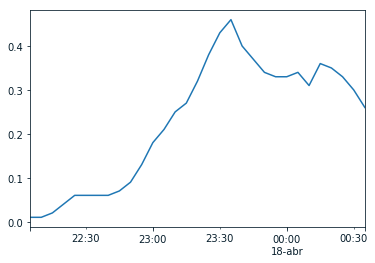

In [55]:
data[data.pk==99].rain.plot()

In [47]:
data,cuencas_malas = cron()

201904171945-201904180045-246-sample_user
201904172150-201904180050-326-sample_user
201904172200-201904180035-1014-sample_user
201904171955-201904180055-236-sample_user
201904172010-201904180110-94-sample_user
201904171940-201904180040-344-sample_user
201904171955-201904180055-247-sample_user
201904171935-201904180035-145-sample_user
201904172035-201904180135-99-sample_user
201904172020-201904180120-332-sample_user
201904172015-201904180115-101-sample_user
201904171955-201904180055-181-sample_user
201904172000-201904180100-166-sample_user
201904172200-201904180035-104-sample_user
201904172010-201904180110-333-sample_user
201904172115-201904180045-260-sample_user
201904172000-201904180100-268-sample_user
201904172150-201904180050-92-sample_user
201904172030-201904180130-273-sample_user
201904171950-201904180050-161-sample_user
201904172035-201904180135-116-sample_user
201904172130-201904180230-108-sample_user
201904172200-201904180035-96-sample_user
201904172200-201904180035-93-sample_u